In [181]:
# necessary libraries in one palce

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder




In [182]:
# load the Titanic dataset

titanic_data = sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [183]:
# find missing values

missing_values = titanic_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [184]:
# drop embark_town (redundant), deck (many missing values) and alive 

titanic_data.drop(['deck', 'embark_town', 'alive'], axis=1, inplace=True)

In [185]:
# fill missing values

titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)
titanic_data['fare'].fillna(titanic_data['fare'].median(), inplace=True)

In [186]:
# One-Hot Encoding using pd.get_dummies

titanic_data = pd.get_dummies(titanic_data, columns=['sex', 'embarked', 'class', 'who', 'adult_male', 'alone'], drop_first=True)


In [187]:
titanic_data

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,adult_male_True,alone_True
0,0,3,22.0,1,0,7.2500,True,False,True,False,True,True,False,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,False,False,True,False,False
2,1,3,26.0,0,0,7.9250,False,False,True,False,True,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,False,True,False,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,True,False,True,False,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True,True,False,True,False,True,True
887,1,1,19.0,0,0,30.0000,False,False,True,False,False,False,True,False,True
888,0,3,28.0,1,2,23.4500,False,False,True,False,True,False,True,False,False
889,1,1,26.0,0,0,30.0000,True,False,False,False,False,True,False,True,True


In [188]:
# ensure no missing values remain

titanic_data.dropna(inplace=True)

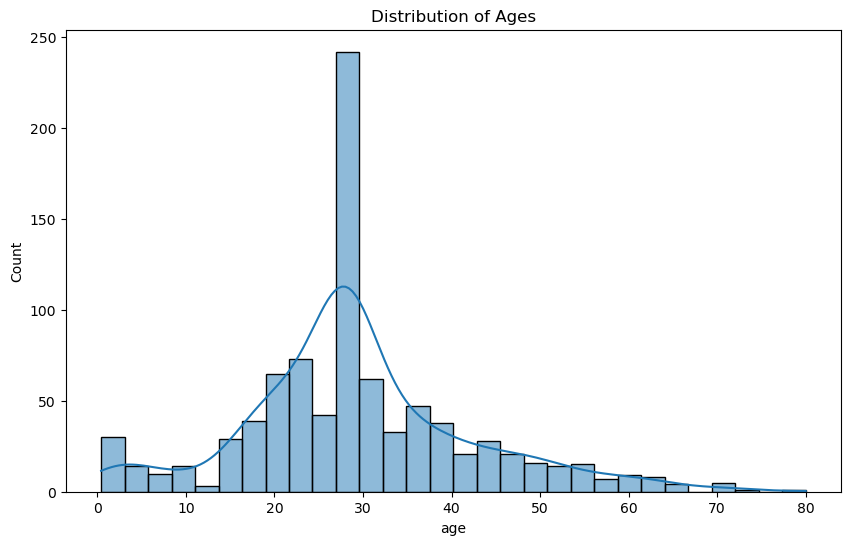

In [189]:
# plotting distribution of ages

plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['age'], bins=30, kde=True)
plt.title('Distribution of Ages')
plt.show()

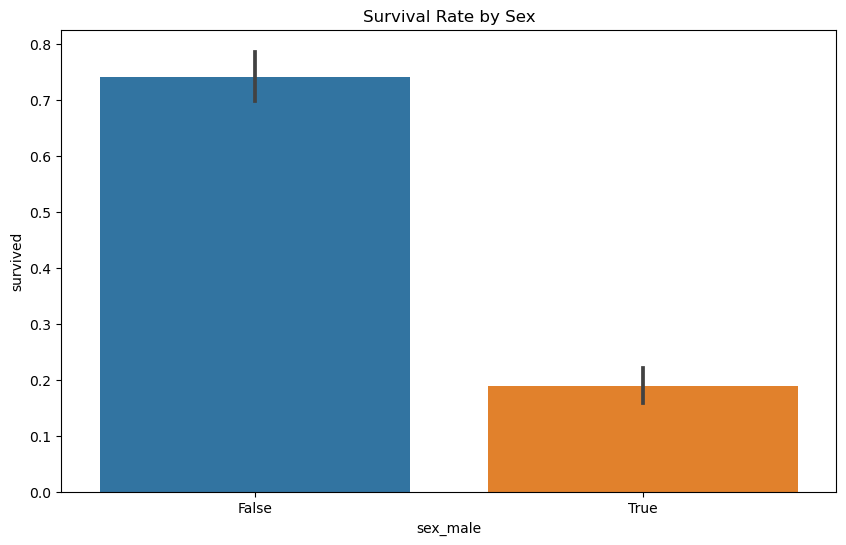

In [190]:
# plot the survival rate by sex

plt.figure(figsize=(10, 6))
sns.barplot(x='sex_male', y='survived', data=titanic_data)
plt.title('Survival Rate by Sex')
plt.show()

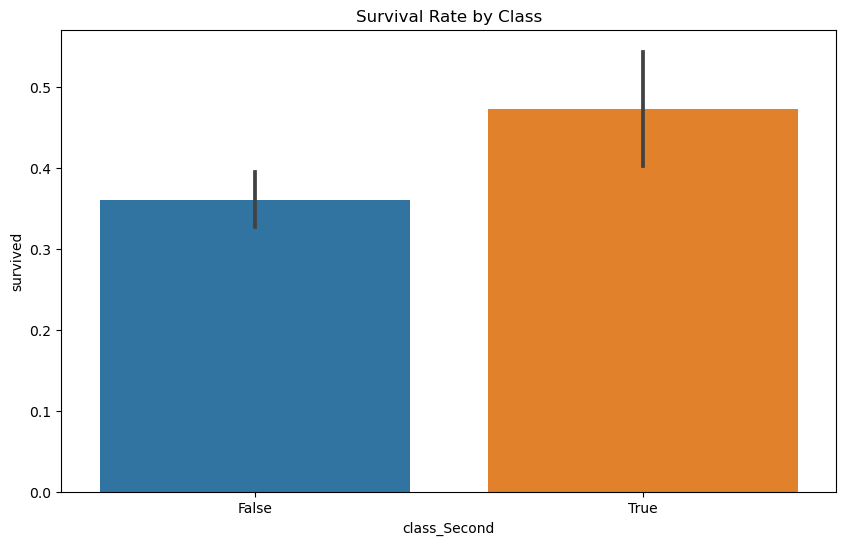

In [191]:
plt.figure(figsize=(10, 6))
sns.barplot(x='class_Second', y='survived', data=titanic_data)
plt.title('Survival Rate by Class')
plt.show()

In [192]:
# train test

# prepare the data for modeling

X = titanic_data.drop(['survived'], axis=1)
y = titanic_data['survived']

# split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)


In [193]:
# rain XGBoost model

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [194]:
# predict on the test set

y_pred = xgb_model.predict(X_test)

In [195]:
# evaluate the model

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# show the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7835820895522388
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       161
           1       0.76      0.67      0.71       107

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

Confusion Matrix:
[[138  23]
 [ 35  72]]


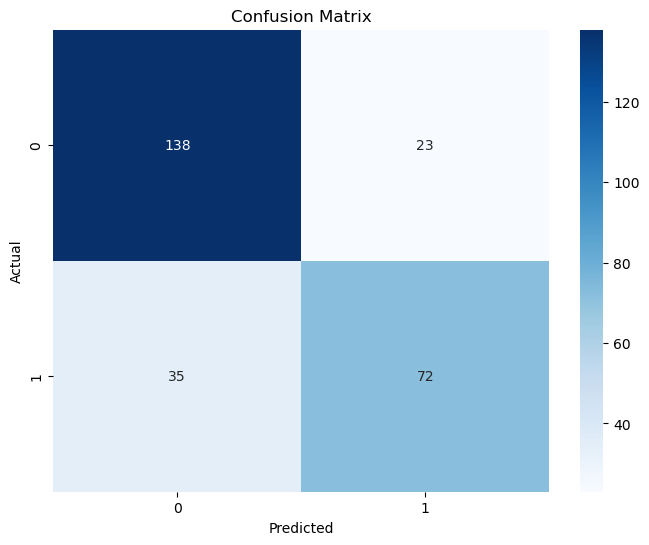

In [196]:
# plot confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


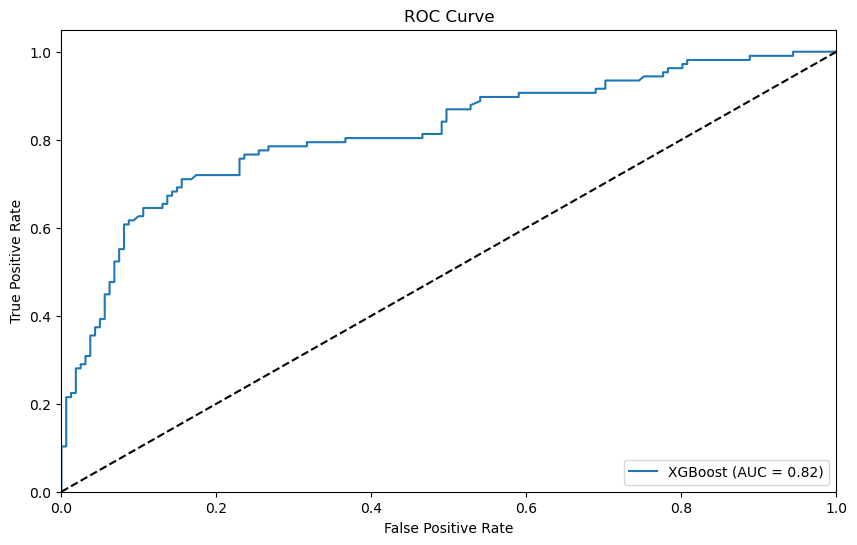

In [197]:
# plot ROC Curve

y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [198]:
# feature importance

importance = xgb_model.feature_importances_
features = X.columns

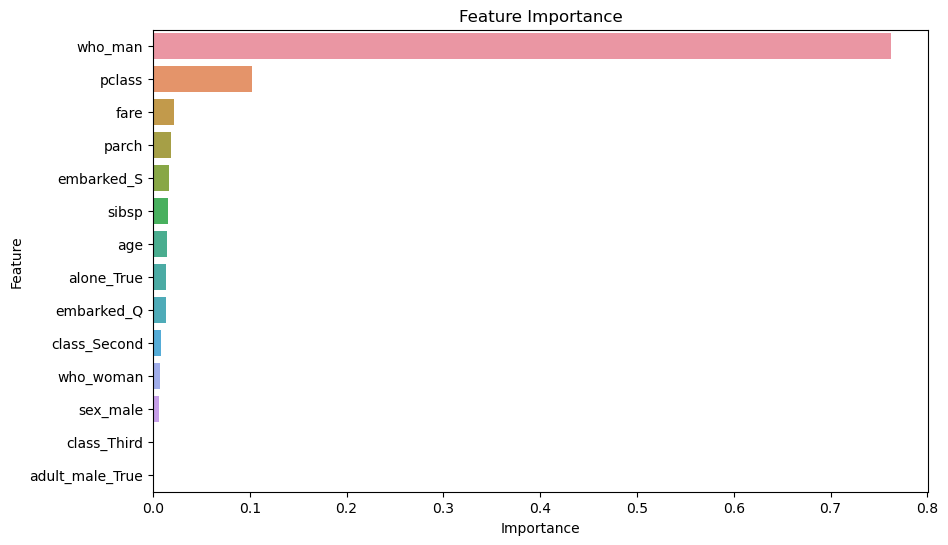

In [199]:
# DataFrame for visualization

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [200]:
# selecting top features based on importance

top_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature']

In [201]:
# now prepare the data with selected features

X_selected = X[top_features]

# again split the data 
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.3, random_state=0)

# again train the XGBoost model with selected features
xgb_model_sel = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model_sel.fit(X_train_sel, y_train_sel)

# predict on the test set with selected features
y_pred_sel = xgb_model_sel.predict(X_test_sel)  


In [202]:
# vealuate your model with selected features

accuracy_sel = accuracy_score(y_test_sel, y_pred_sel)
report_sel = classification_report(y_test_sel, y_pred_sel)
conf_matrix_sel = confusion_matrix(y_test_sel, y_pred_sel)

# show your results for the model with selected features
print(f"Accuracy with selected features: {accuracy_sel}")
print("Classification Report with selected features:")
print(report_sel)
print("Confusion Matrix with selected features:")
print(conf_matrix_sel)

Accuracy with selected features: 0.8022388059701493
Classification Report with selected features:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       168
           1       0.75      0.71      0.73       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268

Confusion Matrix with selected features:
[[144  24]
 [ 29  71]]


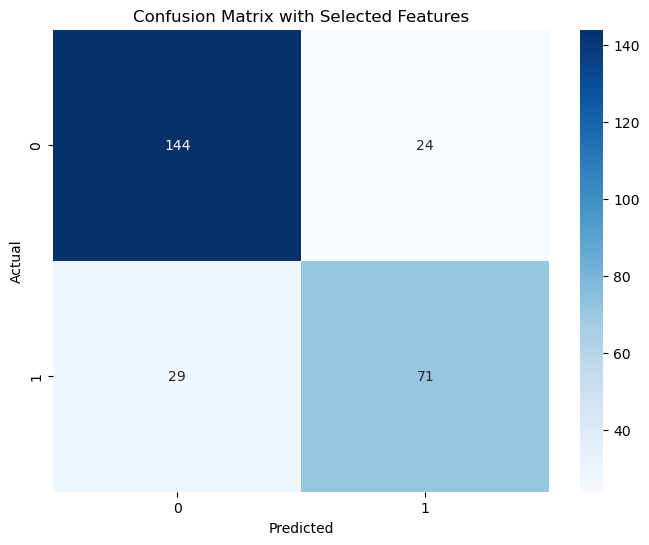

In [203]:
# plot confusion matrix with selected features

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sel, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Selected Features')
plt.show()

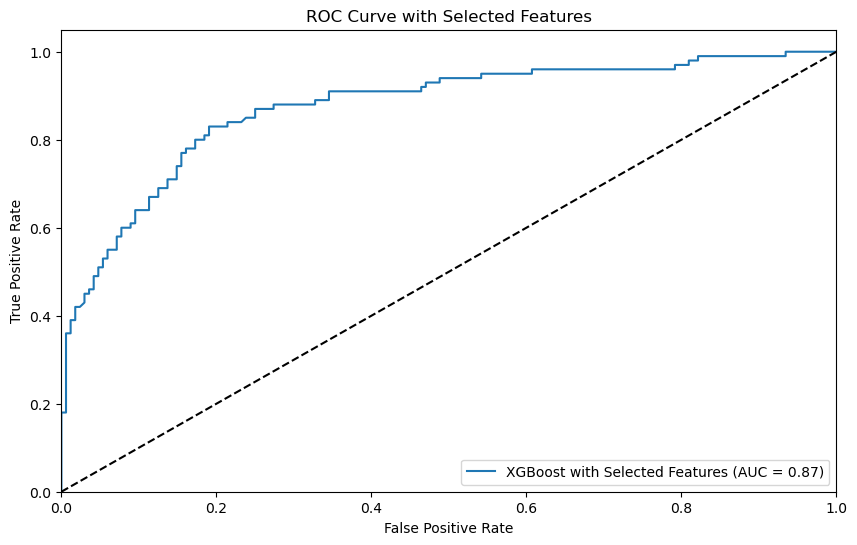

In [204]:
# plot ROC Curve with selected features

# fist get the probabilities for the positive class
y_pred_proba_sel = xgb_model_sel.predict_proba(X_test_sel)[:, 1]

fpr_sel, tpr_sel, _sel = roc_curve(y_test_sel, y_pred_proba_sel)
roc_auc_sel = roc_auc_score(y_test_sel, y_pred_proba_sel)

plt.figure(figsize=(10, 6))
plt.plot(fpr_sel, tpr_sel, label=f'XGBoost with Selected Features (AUC = {roc_auc_sel:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Selected Features')
plt.legend(loc='lower right')
plt.show()
